# Exploratory Analysis

T Dwyer

the following two lines of code read in the data from github, only use them once. They will deposit a csv file in the same directory as this notebook.

In [ ]:
!curl https://raw.githubusercontent.com/Trakky1/Notes_DAT17/master/england_census.csv -o census.csv
!curl https://raw.githubusercontent.com/Trakky1/Notes_DAT17/master/england_ks4final.csv -o england_ks4final.csv  

In [1]:
#import libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
#printing of multiple outputs from a cell
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#import csv files into dataframes census and school
df_raw=pd.read_csv("census.csv")
df_school_raw=pd.read_csv("england_ks4final.csv",low_memory=False)

#now let's have a look at them:
df_raw.head()
df_school_raw.head()

,URN,LA,ESTAB,NOR,NORG,NORB,PNORG,PNORB,TSENELSE,PSENELSE,...,PSENELK,NUMEAL,NUMENGFL,NUMUNCFL,PNUMEAL,PNUMENGFL,PNUMUNCFL,PNUMFSM,NUMFSMEVER,PNUMFSMEVER
0,100000,201,3614.0,250,119,131,47.6,52.4,7,2.8,...,16,99,71,6,56.3,40.3,3.4,21.1,59,28.6
1,100001,201,6005.0,730,730,0,100,0,0,0,...,0,0,0,0,0,0,0,NP,NP,NP
2,100002,201,6006.0,253,105,148,41.5,58.5,1,0.4,...,0,0,0,0,0,0,0,NP,NP,NP
3,100003,201,6007.0,918,0,918,0,100,0,0,...,0,0,0,0,0,0,0,NP,NP,NP
4,100463,201,6354.0,204,100,104,49,51,0,0,...,0,0,0,0,0,0,0,NP,NP,NP


,RECTYPE,ALPHAIND,LEA,ESTAB,URN,SCHNAME,SCHNAME_AC,ADDRESS1,ADDRESS2,ADDRESS3,...,TAVENT_GAV_PTQ_EE,TAVENT_GHI_PTQ_EE,TAVENT_GFSM6CLA1A_PTQ_EE,TAVENT_GNFSM6CLA1A_PTQ_EE,TAVENT_GFSM_13,TAVENT_GNFSM_13,TAVENT_GFSM_14_PTQ,TAVENT_GNFSM_14_PTQ,TAVENT_GFSM6CLA1A_15_PTQ_EE,TAVENT_GNFSM6CLA1A_15_PTQ_EE
0,1,11828,201,6007,100003,City of London School,,Queen Victoria Street,,,...,NP,NP,NP,NP,NaN,NaN,NaN,NaN,NaN,NaN
1,1,11830,201,6005,100001,City of London School for Girls,,St Giles' Terrace,Barbican,,...,NP,NP,NP,NP,NaN,NaN,NaN,NaN,NaN,NaN
2,4,,201,,,,,,,,...,,,,,,,,,,
3,1,368,202,4285,100053,Acland Burghley School,,Burghley Road,,,...,8.9,9.8,8.4,9.5,8.1,9.8,9,10.2,8.4,10.6
4,1,9318,202,4611,100054,The Camden School for Girls,,Sandall Road,,,...,8.2,10.2,7.8,9.8,8.6,9.3,7.3,8.6,7.5,8.9


### Exploring the census data i.e. df_raw

In [3]:
#first check the datatypes of the columns as i want to do calculations and grouping using them.
df_raw.dtypes

URN             object
LA              object
ESTAB          float64
NOR             object
NORG            object
NORB            object
PNORG           object
PNORB           object
TSENELSE        object
PSENELSE        object
TSENELK         object
PSENELK         object
NUMEAL          object
NUMENGFL        object
NUMUNCFL        object
PNUMEAL         object
PNUMENGFL       object
PNUMUNCFL       object
PNUMFSM         object
NUMFSMEVER      object
PNUMFSMEVER     object
dtype: object

#### Create Working Dataframe

As all the columns apart from ESTAB are objects, I will need to convert them to numbers.  I also need to check for nulls, in the abbreviations files null values are denoted by NP (not published). 

Before I do that I will create a working dataframe, using the following rules:
1. Exclude Independent schools;
2. Use census data that may highlight disadvantage;
3. combine the schools of interest with the census data 

This will give me a working dataframe to explore

In [4]:
# There are some data points that may be better served by using percentages, rather than raw numbers
# for example those with SEN,English as foriegn language and free school meals so make 2 data frames with numbers & percentages

cols_to_keep1=["URN","LA","ESTAB","NOR","TSENELSE","TSENELK","NUMEAL","NUMENGFL","PNUMFSM"]
cols_to_keep2=["URN","LA","ESTAB","NOR","PSENELSE","PSENELK","PNUMEAL","PNUMENGFL","PNUMFSM"]
#make two dataframes with the numbers
df_nums = df_raw[cols_to_keep1]
df_perc = df_raw[cols_to_keep2]

In [5]:
df_nums.head()
df_perc.head()

,URN,LA,ESTAB,NOR,TSENELSE,TSENELK,NUMEAL,NUMENGFL,PNUMFSM
0,100000,201,3614.0,250,7,40,99,71,21.1
1,100001,201,6005.0,730,0,0,0,0,NP
2,100002,201,6006.0,253,1,0,0,0,NP
3,100003,201,6007.0,918,0,0,0,0,NP
4,100463,201,6354.0,204,0,0,0,0,NP


,URN,LA,ESTAB,NOR,PSENELSE,PSENELK,PNUMEAL,PNUMENGFL,PNUMFSM
0,100000,201,3614.0,250,2.8,16,56.3,40.3,21.1
1,100001,201,6005.0,730,0,0,0,0,NP
2,100002,201,6006.0,253,0.4,0,0,0,NP
3,100003,201,6007.0,918,0,0,0,0,NP
4,100463,201,6354.0,204,0,0,0,0,NP


For the preliminary analysis I will use the three columns NFTYPE = School type, ESTAB = Establishment number and URN = school unique reference number.
The column NFTYPE contains the data on the type of school, I want to discard independent schools so any school with the NFTYPE = IND or INDSPEC I can discard.

In [21]:
#easy way to exclude values
cols2keep = ['ESTAB','URN','NFTYPE']
ValList = ('IND','INDSPEC')
df_Int=df_school_raw[cols2keep]
df_Ref=df_Int[~df_Int.NFTYPE.isin(ValList)]
df_Ref.head()
df_Ref.tail()
df_Ref.dtypes

,ESTAB,URN,NFTYPE
2,,,
3,4285,100053,CY
4,4611,100054,VA
7,4275,100052,CY
8,4104,100049,CY


,ESTAB,URN,NFTYPE
5482,7004,126155,CYS
5485,7013,136114,FDS
5486,,,
5487,,,
5488,,,


ESTAB     object
URN       object
NFTYPE    object
dtype: object

In [19]:
df_Ref['ESTAB'].replace('', np.nan, inplace=True)
df_Ref.head()

,ESTAB,URN,NFTYPE
2,,,
3,4285,100053,CY
4,4611,100054,VA
7,4275,100052,CY
8,4104,100049,CY


Now link the percentage census data df_perc dataframe with the ref dataframe into the one I shall use for some exploratory analysis.
I will use an inner join to make sure that i return a full dataset to query. ref: course notes & http://chris.friedline.net/2015-12-15-rutgers/lessons/python2/04-merging-data.html

In [29]:
#can't figure out how to drop these rows with empty cells, try the join and see if that works
df_census = pd.merge(left=df_perc,right=df_Ref, left_on='URN', right_on='URN')
df_census.head()

,URN,LA,ESTAB_x,NOR,PSENELSE,PSENELK,PNUMEAL,PNUMENGFL,PNUMFSM,ESTAB_y,NFTYPE
0,137181,202,4000.0,835,3.8,10.7,49.8,40,31.1,4000,AC
1,100049,202,4104.0,1227,4.2,7.7,69.8,30.2,40.4,4104,CY
2,100050,202,4166.0,1114,1.3,10.1,36.1,63.5,27.8,4166,CY
3,100051,202,4196.0,831,4.2,15,83.3,16.6,38.2,4196,CY
4,100052,202,4275.0,1205,2.5,11.9,57.8,42.1,22.8,4275,CY


In [30]:
df_census.drop('ESTAB_x',axis =1, inplace= True)
df_census.head()

,URN,LA,NOR,PSENELSE,PSENELK,PNUMEAL,PNUMENGFL,PNUMFSM,ESTAB_y,NFTYPE
0,137181,202,835,3.8,10.7,49.8,40,31.1,4000,AC
1,100049,202,1227,4.2,7.7,69.8,30.2,40.4,4104,CY
2,100050,202,1114,1.3,10.1,36.1,63.5,27.8,4166,CY
3,100051,202,831,4.2,15,83.3,16.6,38.2,4196,CY
4,100052,202,1205,2.5,11.9,57.8,42.1,22.8,4275,CY


### Explore Working dataframe

The df_census dataframe will be used for the preliminary analyis.  
First look for correlates, check out summary stats and then consider further analysis i.e linking to outcomes data and KS2 achievement.

In [36]:
df_census.describe()
df_census.dtypes
df_census.isnull().sum()

,URN,LA,NOR,PSENELSE,PSENELK,PNUMEAL,PNUMENGFL,PNUMFSM,ESTAB_y,NFTYPE
count,4019,4019,4019,4019,4019,4019,4019,4019,4019,4019
unique,4019,151,1524,204,337,690,687,599,784,16
top,139534,886,72,100,0,0,100,6.3,4000,ACC
freq,1,125,17,524,544,166,155,26,109,1338


URN          object
LA           object
NOR          object
PSENELSE     object
PSENELK      object
PNUMEAL      object
PNUMENGFL    object
PNUMFSM      object
ESTAB_y      object
NFTYPE       object
dtype: object

URN          0
LA           0
NOR          0
PSENELSE     0
PSENELK      0
PNUMEAL      0
PNUMENGFL    0
PNUMFSM      0
ESTAB_y      0
NFTYPE       0
dtype: int64

*Convert columns to integer and float datatypes so that numerical calculations can be performed.  The join discarded empty rows so this should now work*.

In [37]:
cols=['URN','LA','NOR','ESTAB_y']

df_census[cols]=df_census[cols].applymap(np.int)

In [38]:
cols=["PSENELSE","PSENELK","PNUMEAL","PNUMENGFL","PNUMFSM"]
df_census[cols]=df_census[cols].applymap(np.float64)

In [39]:
df_census.dtypes

URN            int64
LA             int64
NOR            int64
PSENELSE     float64
PSENELK      float64
PNUMEAL      float64
PNUMENGFL    float64
PNUMFSM      float64
ESTAB_y        int64
NFTYPE        object
dtype: object

## Exploratory statistical Analysis

In [41]:
df_census.groupby(['NFTYPE'])['PNUMFSM'].mean()
df_census.groupby(['NFTYPE'])['PNUMFSM'].median()

NFTYPE
AC      23.173276
ACC     10.325785
ACCS    37.688393
ACS     48.040909
CTC     10.100000
CY      15.931157
CYS     39.076864
F       16.456667
FD      16.918216
FDS     38.577778
FS      33.240000
FSS     21.116216
FUTC    13.344737
NMSS    23.732759
VA      14.719485
VC      11.773529
Name: PNUMFSM, dtype: float64

NFTYPE
AC      22.05
ACC      8.40
ACCS    39.35
ACS     44.20
CTC      7.00
CY      13.80
CYS     37.10
F       14.80
FD      15.20
FDS     36.80
FS      33.30
FSS     19.00
FUTC    11.90
NMSS    21.15
VA      12.35
VC       9.80
Name: PNUMFSM, dtype: float64

get this error for mode: AttributeError: Cannot access callable attribute 'mode' of 'SeriesGroupBy' objects, try using the 'apply' method

In [51]:
df_census.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
URN,4019.0,128015.174919,13308.272023,100049.0,116472.5,136217.0,138015.00,142472.0
LA,4019.0,677.750187,270.035548,202.0,353.0,845.0,888.00,938.0
NOR,4019.0,797.216472,500.720392,0.0,340.5,825.0,1157.00,3001.0
PSENELSE,4019.0,20.813909,38.403100,0.0,1.0,1.9,4.10,100.0
PSENELK,4019.0,9.688729,7.641692,0.0,3.8,9.0,14.05,52.7
PNUMEAL,4019.0,14.939587,19.494200,0.0,2.4,6.3,19.10,99.0
PNUMENGFL,4019.0,84.745534,19.703793,0.0,80.6,93.4,97.50,100.0
PNUMFSM,4019.0,19.427594,14.602498,0.0,8.1,15.4,27.10,93.9
ESTAB_y,4019.0,5097.223190,1227.944718,2006.0,4043.0,4504.0,6905.00,7511.0


In [53]:
df_census.corr()

,URN,LA,NOR,PSENELSE,PSENELK,PNUMEAL,PNUMENGFL,PNUMFSM,ESTAB_y
URN,1.000000,0.255233,0.139553,-0.257944,0.121371,-0.138002,0.134154,-0.242469,-0.141303
LA,0.255233,1.000000,-0.057444,0.023815,-0.061743,-0.479298,0.479747,-0.279272,-0.016673
NOR,0.139553,-0.057444,1.000000,-0.680311,0.212038,0.074298,-0.069343,-0.534263,-0.453308
PSENELSE,-0.257944,0.023815,-0.680311,1.000000,-0.528355,-0.081307,0.081415,0.628400,0.771807
PSENELK,0.121371,-0.061743,0.212038,-0.528355,1.000000,0.114697,-0.111870,-0.097589,-0.402029
PNUMEAL,-0.138002,-0.479298,0.074298,-0.081307,0.114697,1.000000,-0.992099,0.197471,-0.016363
PNUMENGFL,0.134154,0.479747,-0.069343,0.081415,-0.111870,-0.992099,1.000000,-0.197536,0.016888
PNUMFSM,-0.242469,-0.279272,-0.534263,0.628400,-0.097589,0.197471,-0.197536,1.000000,0.532575
ESTAB_y,-0.141303,-0.016673,-0.453308,0.771807,-0.402029,-0.016363,0.016888,0.532575,1.000000


from the correlation matrix above PNUMFSM (Percentage of  pupils eligible for free school meals), PSENELSE (Percentage of SEN pupils with a statement or EHC plan) and PNUMEAL (Percentage of pupils with English not as first language) appear to be  strongly correlated. Use a heat map to see this more clearly

In [49]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

           PNUMFSM  PSENELSE   PNUMEAL
PNUMFSM   1.000000  0.628400  0.197471
PSENELSE  0.628400  1.000000 -0.081307
PNUMEAL   0.197471 -0.081307  1.000000
Axes(0.125,0.125;0.62x0.755)


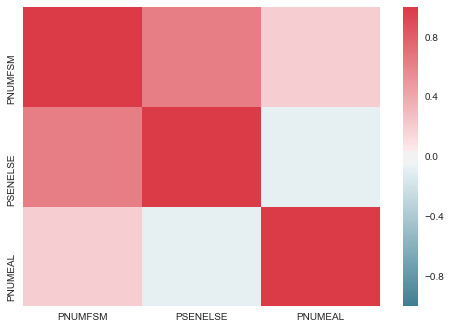

In [50]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = df_census[['PNUMFSM', 'PSENELSE', 'PNUMEAL']].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)